In [166]:
import pandas as pd

In [167]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [168]:
from sklearn.model_selection import train_test_split
X = df[['Glucose', 'BloodPressure']].values
y = df['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [169]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

In [170]:
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [171]:
y_pred = logit.predict(X_train)

In [172]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_train)

0.7534722222222222

In [173]:
#Logistic Regression

ValueError: too many values to unpack (expected 2)

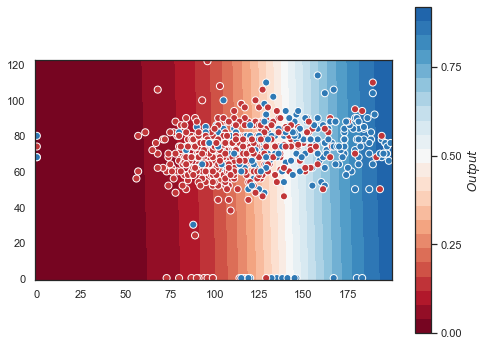

In [174]:
#make a continuous grid of values and evaluate the probability of each (x, y) point in the grid:
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

grid = np.c_[xx.ravel(), yy.ravel()]
probs = logit.predict_proba(grid)[:, 1].reshape(xx.shape)
#Now, plot the probability grid as a contour map and additionally show the test set samples on top of it:

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$Output$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(x1grid), ylim=(x2grid),
       xlabel="$Glucose$", ylabel="BloodPressure$")

In [ ]:
#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

In [175]:
y_pred = knn.predict(X_train)

In [176]:
accuracy_score(y_pred, y_train)

0.7986111111111112

ValueError: too many values to unpack (expected 2)

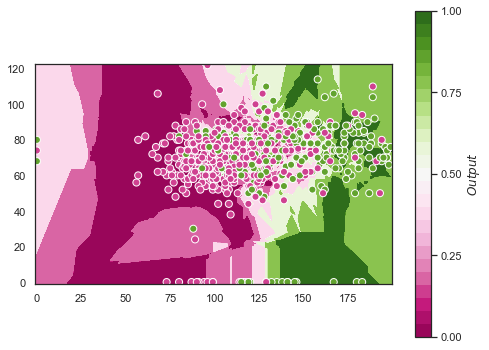

In [177]:
# make a continuous grid of values and evaluate the probability of each (x, y) point in the grid:
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

grid = np.c_[xx.ravel(), yy.ravel()]
probs = knn.predict_proba(grid)[:, 1].reshape(xx.shape)
#Now, plot the probability grid as a contour map and additionally show the test set samples on top of it:

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="PiYG",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$Output$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="PiYG", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(x1grid), ylim=(x2grid),
       xlabel="$Glucose$", ylabel="BloodPressure$")

In [178]:
#TreeDecisionClassifier

In [179]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [180]:
y_pred = tree.predict(X_train)

In [181]:
accuracy_score(y_pred, y_train)

0.9618055555555556

ValueError: too many values to unpack (expected 2)

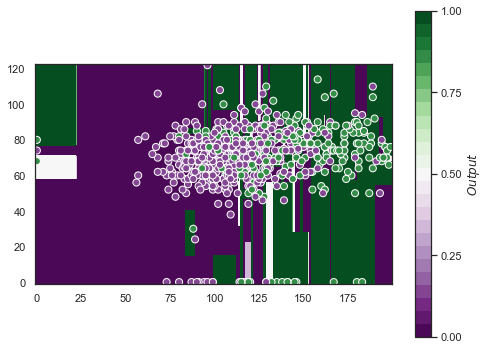

In [182]:
#make a continuous grid of values and evaluate the probability of each (x, y) point in the grid:
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

grid = np.c_[xx.ravel(), yy.ravel()]
probs = tree.predict_proba(grid)[:, 1].reshape(xx.shape)
#plot the probability grid as a contour map and additionally show the test set samples on top of it:

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="PRGn",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$Output$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="PRGn", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(x1grid), ylim=(x2grid),
       xlabel="$Glucose$", ylabel="BloodPressure$")

In [ ]:
#Random Forest

In [185]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [186]:
y_pred = forest.predict(X_train)

In [187]:
accuracy_score(y_pred, y_train)

0.9618055555555556

ValueError: too many values to unpack (expected 2)

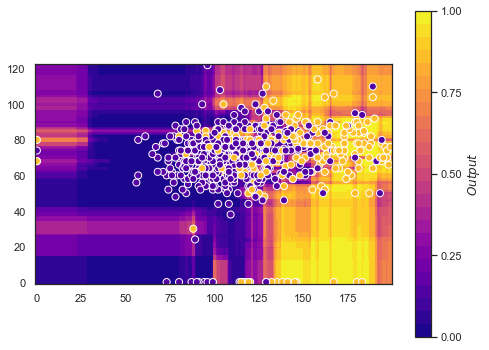

In [191]:
#make a continuous grid of values and evaluate the probability of each (x, y) point in the grid:
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

grid = np.c_[xx.ravel(), yy.ravel()]
probs = forest.predict_proba(grid)[:, 1].reshape(xx.shape)
#plot the probability grid as a contour map and additionally show the test set samples on top of it:

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="plasma",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$Output$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="plasma", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(x1grid), ylim=(x2grid),
       xlabel="$Glucose$", ylabel="BloodPressure$")